In [198]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
import pandas as pd
import numpy as np
import requests
import json
import sys
import os
import pickle
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [200]:
sys.path.append('../../docker-project-template-main/ift6758/ift6758/client/')

from game_client import GameClient as game_client
from serving_client import ServingClient as serving_client

In [201]:
model_names = ['lrd', 'lrda', 'lda', 'xgboost']

In [202]:
sc = serving_client()

In [203]:
workspace = widgets.Text(description='Workspace')
model_name = widgets.Text(description='Model Name')
version = widgets.Text(description='Model Version')

# display(workspace)
# display(model_name)
# display(version)

download_button = widgets.Button(description="Download Model")

output = widgets.Output()


@output.capture()
def on_button_clicked(b):
    sc.download_registry_model(workspace = workspace.value, model = model_name.value, version = str(version.value))
    with output:
        print("Downloaded")
    
    
container2 = widgets.HBox(children=[workspace,model_name,version])
display(container2)
display(download_button)
download_button.on_click(on_button_clicked)
display(output)

Button(description='Download Model', style=ButtonStyle())

Output()

In [204]:
sc.model

'lrd'

In [206]:
game_id = widgets.Text(description='Game ID')
display(game_id)
button = widgets.Button(description="Ping Game")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    gc = game_client(game_id = game_id.value)
    gc.get_game()
    model_df, idx, current_status_df = gc.ping_game(sc.model)
    print("*********")
    print(model_df.columns)
    preds = sc.predict(model_df)
    preds = [pred[1] for pred in preds]
    # dashboard = pd.DataFrame({"goal_ind":y_P, "preds_proba_nn": nn_predicted_probs_P[:,1], "xG": preds[:,1] })
    remaining_time = current_status_df.remaining_time.values[-1]
    period = current_status_df.current_period.values[-1]
    
    current_status_df["predictions"] = preds
    current_status_df["xG"] = current_status_df["predictions"].apply(lambda x: 1 if(x>0.50) else 0)

    
    home_team = gc.home_team
    away_team = gc.away_team
    # df.groupby(['Name', 'Fruit'])['Number'].agg('sum')
    grouped_df = current_status_df.groupby("shot_by_team")["xG"].agg("sum")
    dashboard_dict = {f"Period: {period}": ["Home Team",home_team, grouped_df["Home"]], f"Time Remaining: {remaining_time}": ["Away Team",away_team, grouped_df["Away"]]}
    dashboard_df = pd.DataFrame(dashboard_dict)
    with output:

        #define figure and axes
        fig, ax = plt.subplots()

        #hide the axes
        fig.patch.set_visible(False)
        ax.axis('off')
        ax.axis('tight')

        #create table
        table = ax.table(cellText=dashboard_df.values, colLabels=dashboard_df.columns, loc='center')

        #display table
        fig.tight_layout()
        plt.show()



    

button.on_click(on_button_clicked)
display(output)

Text(value='', description='Game ID')

Button(description='Ping Game', style=ButtonStyle())

Output()

KeyError: 'Away Team'

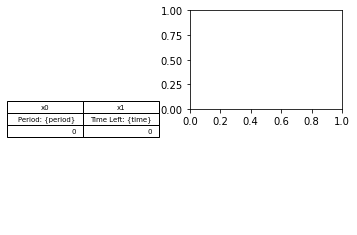

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

d = {'x{}'.format(i): range(1) for i in range(2)}

table = pd.DataFrame(d, )

plt.figure()

# table
plt.subplot(121)

cell_text = []
period = 1
time = 2
cell_text.append(["Period: {period}", "Time Left: {time}"])
for row in range(len(table)):
    cell_text.append(table.iloc[row])

plt.table(cellText=cell_text, colLabels=table.columns, loc='center')
plt.axis('off')

# plot
plt.subplot(222)
plt.plot(table['Away Team'],table['Home Team'])

# plot
plt.subplot(224)
plt.plot(table['Away Team'],table['Home Team'])

plt.show()

NameError: name 'preds' is not defined

In [54]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()